# Plotting Visualizations - Project 1 Group 3 (NFTs)

In [292]:
# Run imports
import requests
import json
import pandas as pd

import hvplot.pandas 
import numpy as np
import panel as pn
from panel.interact import interact
from panel import widgets

### Prepare Data

In [293]:
# Add Urls to data sources
url = "https://api.opensea.io/api/v1/events?limit=100"
url1 = "https://api.opensea.io/api/v1/events?only_opensea=false&offset=0&limit=50"
url2 = "https://api.opensea.io/api/v1/assets?order_direction=desc&offset=0&limit=50"

response = requests.request("GET", url)
opensea_data_pull = json.loads(response.text)
opensea_data_pull1 = json.loads(response.text)


In [294]:
# Data paths for reference:
# bbb = opensea_data_pull["assets"][5]["asset_contract"]["default_to_fiat"]
# price = opensea_data_pull["asset_events"][0]["payment_token"]["usd_price"]
# bid = opensea_data_pull["asset_events"][0]["bid_amount"]

### Visual #1: NFT Bid Trends

In [295]:
#CREATE VISUAL: NFT BID TRENDS
# Pull dates and prices for each asset and create variables
data_list = opensea_data_pull["asset_events"]

listing_date_list = []
listing_price_list = []

In [296]:
# Iterate through each item in list
for each in data_list:
    
    # grab the id
    listing_date = each["asset"]["asset_contract"]["created_date"]
    listing_date = listing_date[0:10]  # reformat dates to be cleaner

    listing_price = each["bid_amount"]
    try:
        listing_price = float(listing_price)
        listing_price = (listing_price/ 10000000000000000)
    except:
        listing_price = 0
        
    # append id to list of ids
    listing_date_list.append(listing_date)
    listing_price_list.append(listing_price)

In [297]:
# Cleaner method, give column headers
bidtrends_df = pd.DataFrame(
    {'listing_date': listing_date_list,
     'listing_price': listing_price_list
     })

In [298]:
#Clean data, drop NAs
bidtrends_df = bidtrends_df.dropna()
bidtrends_df.head()

,listing_date,listing_price
0,2021-01-11,61.48
1,2021-09-08,250.00
2,2021-10-30,3.20
3,2021-10-30,3.20
4,2021-08-11,0.00


In [299]:
#Sort values by date
bidtrends_df = bidtrends_df.sort_values("listing_date")

In [300]:
#Plot the data using a line plot to show differences over time and name the plot for easier dashboard build later on
plot_1 = bidtrends_df.hvplot.line(x="listing_date", y="listing_price", xlabel="Date", ylabel="Listing Price", title="NFT Bid Trends", rot=45, width=1200, grid=True)

In [301]:
plot_1

:Curve   [listing_date]   (listing_price)

#### This visual provided our group with the trends in NFT bid prices from 2018-2021.  As you can see by the graph, bids have periodic jumps throughout the year, most notably in November and December 2020, and April, June, August, September, and October.

### Visual #2: Number of NFT Sales per Day

In [302]:
#CREATE VISUAL: Number of NFT Sales per Day
data_list = opensea_data_pull["asset_events"]

#Create variables
listing_date_list = []
listing_price_list = []

# iterate through each item in list
for each in data_list:
    
    # grab the id
    listing_date = each["asset"]["asset_contract"]["created_date"]
    listing_date = listing_date[0:10]  # reformat dates to be cleaner
    try:
        listing_price = float(each["bid_amount"])
        listing_price = listing_price / 10000000000000
    except:
        listing_price = 0
        
    # append id to list of ids
    listing_date_list.append(listing_date)
    listing_price_list.append(listing_price)

In [303]:
# cleaner method. give column headers
sales_df = pd.DataFrame(
    {'listing_date': listing_date_list,
     'listing_price': listing_price_list
     })
sales_df = sales_df.set_index("listing_date")
sales_df = sales_df.dropna()

In [304]:
#create data frame for number of sales
numsales_df = sales_df.groupby(["listing_date"]).count()
numsales_df = numsales_df.sort_values("listing_date")
numsales_df.head(20)

,listing_price
listing_date,
2019-09-09,1
2019-12-04,1
2020-02-07,1
2020-12-02,6
2020-12-12,2
2021-01-11,1
2021-03-17,1
2021-04-16,1
2021-04-22,1


In [305]:
#Plot the data using a bar chart to show trends in each time period
plot_2 = numsales_df.hvplot.bar(
    title= "Number of NFT Sales Per Day",
    xlabel = "Date",
    ylabel = "Sales Count",
    rot=45,
    width=1200,
    #color="Sales Count",
    grid=True
)

In [306]:
plot_2

:Bars   [listing_date]   (listing_price)

#### This visual provided our group with the number of NFT sales per day.  You can see jumps in sales periodically throughout the year, with the most significant jump in June of 2021.

### Visual #3: Dollar Volume of Sales per Day

In [307]:
#CREATE VISUAL: NFT Volume per Day
sales_df = sales_df.sort_index(ascending=True)
sales_df.head()

,listing_price
listing_date,
2019-09-09,277630.0
2019-12-04,58200.0
2020-02-07,8620.0
2020-12-02,94880.0
2020-12-02,0.0


In [308]:
#create new df
volsales_df = sales_df.groupby(["listing_date"]).sum()
volsales_df = volsales_df.sort_values("listing_date")

volsales_df.head(5)

,listing_price
listing_date,
2019-09-09,277630.0
2019-12-04,58200.0
2020-02-07,8620.0
2020-12-02,285440.0
2020-12-12,188900.0


In [309]:
#Plot the data using a bar chart to show trends in each time period
plot_3 = volsales_df.hvplot.bar(
    title= "Volume of Sales Per Day (USD$)",
    xlabel = "Date",
    ylabel = "Volume of Sales",
    rot=45,
    yformatter="%.0f",
    width=1200,
#     color="listing_price",
    grid=True,
#    colorbar=True

)

In [310]:
plot_3

:Bars   [listing_date]   (listing_price)

#### This visual provided our group with volume of sales per day, rather than count of sales per day as shown in the prior visual.  As seen in the graph, there are several timeframes with higher than normal sales volume, including November 2020, June 2021, August 2021, and September 2021.

### Visual #4: Top 10 NFT Bids on OpenSea

In [311]:
#CREATE VISUAL: Top 10 Bids

data_list = opensea_data_pull["asset_events"]

listing_date_list = []
listing_price_list = []

# iterate through each item in list
for each in data_list:
    
    # grab the id
    listing_date = each["asset"]["asset_contract"]["created_date"]
    listing_date = listing_date[0:10]  # reformat dates to be cleaner

    listing_price = (each["bid_amount"])
    try:
        listing_price = float(listing_price)
        listing_price = listing_price/ 10000000000000000
    except:
        listing_price=0

    # append id to list of ids
    listing_date_list.append(listing_date)
    listing_price_list.append(listing_price)

In [312]:
# cleaner method. give column headers
df = pd.DataFrame(
    {'listing_date': listing_date_list,
     'listing_price': listing_price_list
     })

In [313]:
# Prepare data of Top 10 NFT Bids on OpenSea in barchart
bid_price_df = pd.DataFrame(listing_price_list)
top_bids = bid_price_df.sort_values(0, ascending=False)
bid_price= top_bids.head(10)
bid_price

,0
62,572.760
85,480.000
23,334.273
99,322.000
57,287.750
15,277.630
1,250.000
74,180.000
42,154.250
73,112.130


In [314]:
#Plot the data using a bar chart to show trend in top 10
plot_4  = bid_price.hvplot.bar(title="Top 10 NFT Bids on OpenSea", xlabel="NFT Project Index Number", ylabel="Bid Price ($USD)", grid=True)

In [315]:
plot_4

:Bars   [index]   (0)

#### This visual provided our group with the top 10 most expensively priced NFT projects.  As of 11/3/2021, the most expensive bids are between 690 to 67 (which varies per minute as data is updated).

### Visual #5: Number of Sales per Token ID

In [316]:
#CREATE VISUAL: Number of sales per token ID
# Pull dates and prices for each asset
token_sales_list = opensea_data_pull1['asset_events']
token_id_list = []
num_sales_list = []

# Iterate through each item in list
for each in token_sales_list:
    # grab the id
    token_id = each['asset']['token_id']
    token_id = token_id[0:10]
    try:
        num_sales = each['asset']['num_sales']
    except:
        num_sales = 0
        
    # append id to list of ids
    token_id_list.append(token_id)
    num_sales_list.append(num_sales)

In [317]:
# Cleaner method, give column headers
bidtrends_df = pd.DataFrame(
    {'token_id': token_id_list,
     'num_sales': num_sales_list
     })

In [318]:
#Plot the data using a bar chart to show trends over time periods
plot_5 = bidtrends_df.hvplot.bar(
                        title="Number of Sales per NFT by Token ID",
                        x='token_id',
                        xlabel="Token IDs",
                        ylabel="Number of Sales",
                        rot=45,
                        width=1500,
                        grid=True
                        )

In [319]:
plot_5

:Bars   [token_id]   (num_sales)

#### This visual provided our group with number of sales per token ID.  As you can see by the visual above, most tokens sell around 3 times or less.  However, there is one token that has sold significantly more times than all others (6 times).

### Visual #6: Total NFT Buyers and Sellers

In [320]:
#CREATE VISUAL: Total NFT Buyers and Sellers
# Find the total amount of buyers and sellers
data_list = opensea_data_pull1['asset_events']

#Organize a list of buyer usernames
buyers_list = []

#Organize a list of seller usernames
sellers_list = []

# iterate through each item in list
for each in data_list:
    # grab the buyers and sellers
    #buyer_username = each[“asset”][“owner”][“user”][“username”]
    #listing_date = listing_date[0:10]  # reformat dates to be cleaner
    try:
        seller_username = each['from_account']['user']['username']
    #listing_price = listing_price / 10000000000000
    except:
        seller_username = 'NoneType'
    # This is code for the assets database directly below
    try:
        buyer_username = each['asset']['owner']['user']['username']
    #listing_price = listing_price / 10000000000000
    except:
        buyer_username = 'NoneType'
        
    # append id to list of ids
    #seller_username = each[“creator”][“user”][“username”]
    #creator = each[“owner”][“user”][“username”]
    #listing_price = listing_price / 10000000000000
    # append id to list of ids
    buyers_list.append(buyer_username)
    sellers_list.append(seller_username)

In [321]:
users_df = pd.DataFrame(
    {'buyer_username': buyers_list,
     'seller_username': sellers_list
     })

In [322]:
users_df.dropna

<bound method DataFrame.dropna of    buyer_username seller_username
0     NullAddress        NoneType
1       straybits            KJ1G
2          taylor        NoneType
3     twiggyalien     nft_farming
4        NoneType        NoneType
..            ...             ...
95         NFTAPE            None
96           Most            None
97       SuperMan            None
98     DCLBlogger            None
99       NoneType      DeviledEgg

[100 rows x 2 columns]>

In [323]:
countusers_df = users_df.count()
countusers_df

buyer_username     85
seller_username    73
dtype: int64

In [324]:
#Plot the data using a bar chart to compare the volume of buyers/sellers
plot_6 = countusers_df.hvplot.bar(title="Buyers and Sellers", xlabel="Buyer/Seller", ylabel="Number", grid=True)

In [325]:
plot_6

:Bars   [index]   (0)

#### This visual provided our group with the total amount of NFT Buyers and Sellers.  As you can see, there are currently more buyers of NFTs than there are sellers.

### Visual #7: Top 5 NFT Projects by Market Cap

In [326]:
#CREATE VISUAL: Top 5 NFT Projects by Market Cap
NFT_Project_MarketCap = pd.read_csv('../Project_1_Group_3/NFT Projects by Market Cap.csv')
print (NFT_Project_MarketCap)

                       NFT Projects by Market Cap
NFT Projects                     Market Cap (ETH)
CryptoPunks                            1193025.61
Bored Ape Yacht Club                    418574.92
Fidenza by Tyler Hobbs                   163336.5
CyberKongs                               62897.74
Emblem Vault                             33402.22


In [327]:
#Add data into a dataframe
MarketCap_df= pd.DataFrame(NFT_Project_MarketCap).head(6).drop(["NFT Projects"])
MarketCap_df

,NFT Projects by Market Cap
CryptoPunks,1193025.61
Bored Ape Yacht Club,418574.92
Fidenza by Tyler Hobbs,163336.5
CyberKongs,62897.74
Emblem Vault,33402.22


In [328]:
#Rename columns
columns = ["Market_Cap"]
MarketCap_df.columns = columns
MarketCap_df

,Market_Cap
CryptoPunks,1193025.61
Bored Ape Yacht Club,418574.92
Fidenza by Tyler Hobbs,163336.5
CyberKongs,62897.74
Emblem Vault,33402.22


In [329]:
#Change data type for plot
MarketCap_df.dtypes

Market_Cap    object
dtype: object

In [330]:
MarketCap_df["Market_Cap"] = MarketCap_df["Market_Cap"].astype("float")
MarketCap_df["Market_Cap"]

CryptoPunks               1193025.61
Bored Ape Yacht Club       418574.92
Fidenza by Tyler Hobbs     163336.50
CyberKongs                  62897.74
Emblem Vault                33402.22
Name: Market_Cap, dtype: float64

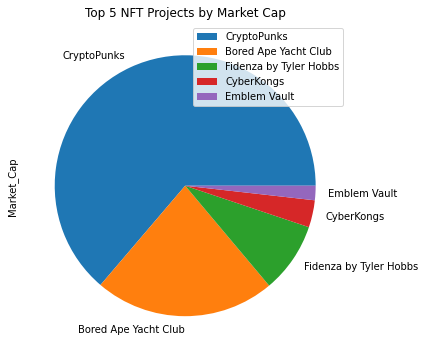

In [331]:
#Plot the data using a pie chart to show the different projects
plot_7 = MarketCap_df.plot.pie(title={"Top 5 NFT Projects by Market Cap"}, ylabel='Market_Cap', subplots=True, figsize=(11, 6))

In [332]:
plot_7

array([<AxesSubplot:title={'center':'Top 5 NFT Projects by Market Cap'}, ylabel='Market_Cap'>],
      dtype=object)

#### This visual provided our group with the top 5 NFT projects by Market Cap.  CryptoPunks far exceeds all otehr projects, at almost 1200000 ETH.

### Visual #8: IN PROCESS BY ANDREW - WILL USE ANOTHER LIBRARY

In [333]:
#CREATE VISUAL: ADD HERE

In [334]:
#Plot the data using a xxxx chart in order to xxx
#plot_8 = 

#### This visual provided our group with...

### DASHBOARD

#### We created a dashboard for the presentation, and included Background/Narrative tabs as well as all visualizations.

##### First Step: Create Markdowns for Overview Tabs

In [350]:
markdown_titlepage = """

# Let's Put the "Fun" in Non-Fungible Tokens (NFTs)  
  
Presentation Date: November 6, 2021  
    
Prepared by Andrew, Rachel, Sam, and Jinhyeong  
  
![image](./images/NFTheads.png)

"""

In [336]:
markdown_intro = """
# Project Objective  
  
Our project is to research and learn patterns and trends in NFTs.  
We will be using the OpenSea API to retrieve data regarding NFTs to determine the following:  
>- What are NFTs?  
>- What are the financial trends?  
>- How profitable are NFTs?    
  
  
  ![image](./images/NFTCollector.png)
"""

In [349]:
markdown_background1 = """
# What are NFTs?  
  
>NFTs, or nonfungible tokens, are unique assets that can’t be replaced with something else,  
>and are verified and stored using blockchain technology.  They can include everything from  
>music to a website domain, but the current craze is really around digital artwork.    
  
>The market exceeded $10B in transaction volume as of 3Q2021.  
  
<h3 align="center"> ![image](./images/NFTcoin.png) </h3> 

"""

In [352]:
markdown_background2 = """
# Examples of Recently Sold NFTs  
  
>The NFT art scene has exploded in recent months, with some of the most expensive NFT sales  
>conducted in the last six months.  A few examples include:    
  
>- CryptoPunk #7523,  $11.8 million  
>- CryptoPunk #7804, $7.56 million  
>- Ocean Front, $6 million  
>- World Wide Web source code, $5.43 million  
  
  
<p float="left">
![image](./images/cryptopunk7523.png)  
![image](./images/cryptopunk7804.png)  
![image](./images/oceanfront.png)  
![image](./images/WWWsourcecode.png)
</p>
"""

In [339]:
markdown_background3 = """
# Minting and Purchasing an NFT  
  
>For NFTs to become valuable and scarce they have to be minted. The term minting in NFTs is similar   
>to minting a coin of silver. Once an NFT is minted on the Ethereum blockchain it becomes unchangeable   
>and tamper-proof. Newly minted NFTs then are able to be sold on third party websites. These websites   
>include Nifty Gateway, Zora, and OpeanSea to name a few.    
  
>For a buyer to purchase an NFT they have to purchase the NFT using Ethereum Tokens.  
>Other blockchain networks that mint NFTs beside Ethereum include Solana, Polygon, and Binance Smart   
>Chain, to name a few. Yet Ethereum reigns supreme for NFTs on chain.  

"""

In [340]:
markdown_background4 = """
# The Rise of NFTs

>NFTs have only been around for a little over a half a decade so they have not become commonplace in  
>today’s society. Yet the NFT space has gained some notoriety this past year due to the fact that   
>massive amounts of money have been allocated to purchase some NFT projects. The vast majority of  
>people in the NFT space, which are the artists and buyers, are between the ages of 18-39.    
  
![image](./images/beeple.png)
"""

In [358]:
markdown_end = """
We learned a lot about NFTs.  Given the data you have seen and this new trend...  
**would YOU buy an NFT?**
  
![image](./images/NFT_comic.png)
"""

In [342]:
#creating a double plot for one of the dashboard tabs since visuals 2 and 3 relate
salesvol_dash = pn.Column(plot_2,plot_3)

In [343]:
visualoverview = """

# Visualization Overview  
  
1. NFT Bid Trends
2. Number of NFT Sales per Day
1. Volume of NFT Sales per Day
2. Top 10 NFT Bid Prices
1. Number of Sales per Token ID
2. Total Buyers/Sellers
1. Top 5 NFT Projects by Market Cap
2.  TBD

"""

In [360]:
#Create Dashboard - NEED TO ADD LAST VISUAL FROM ANDREW and FIX IMAGES
pn.Tabs(
    ("Project 1 - Group 3",markdown_titlepage),
    ("Background Tab 1",markdown_background1),
    ("Background Tab 2",markdown_background2),
    ("Background Tab 3",markdown_background3),
    ("Background Tab 4",markdown_background4),
    ("Visualization Overview",visualoverview),
    ("NFT Bid Trends",plot_1),
    ("Number and Volume of NFT Sales per Day",salesvol_dash),
    ("Top 10 NFT Bid Prices",plot_4),
    ("Number of Sales per Token ID",plot_5),
    ("Total NFT Buyers/Sellers",plot_6),
    ("Top 5 NFT Projects by Market Cap",plot_7),
    ("LAST VISUAL TBD"),
    ("Conclusion",markdown_end)
    
       )

Tabs
    [0] Markdown(str, name='Project 1 - Group 3')
    [1] Markdown(str, name='Background Tab 1')
    [2] Markdown(str, name='Background Tab 2')
    [3] Markdown(str, name='Background Tab 3')
    [4] Markdown(str, name='Background Tab 4')
    [5] Markdown(str, name='Visualization Overview')
    [6] HoloViews(Curve, name='NFT Bid Trends')
    [7] Column
        [0] HoloViews(Bars)
        [1] HoloViews(Bars)
    [8] HoloViews(Bars, name='Top 10 NFT Bid Prices')
    [9] HoloViews(Bars, name='Number of Sales p...)
    [10] HoloViews(Bars, name='Total NFT Buyers/Sellers'...)
    [11] Str(ndarray, name='Top 5 NFT Projects b...)
    [12] Markdown(str)
    [13] Markdown(str, name='Conclusion')

In [345]:
#Create an html of the dashboard for presentation purposes once finalized
#pn.Tabs(
#    ("Project 1 - Group 3",markdown_titlepage),
#    ("Background Tab 1",markdown_background1),
#    ("Background Tab 2",markdown_background2),
 #   ("Backgrond Tab 3",markdown_background3),
 #   ("Background Tab 4",markdown_background4),
 #  ("Visualization Overview",visualoverview),
  #  ("NFT Bid Trends",plot_1),
 #   ("Number and Volume of NFT Sales per Day",salesvol_dash),
 #   ("Top 10 NFT Bid Prices",plot_4),
 #   ("Number of Sales per Token ID",plot_5),
 #   ("Total NFT Buyers/Sellers",plot_6),
 #   ("Top 5 NFT Projects by Market Cap",plot_7),
 #   ("LAST VISUAL TBD"),
 #   ("Conclusion",markdown_end)
 #      ).save("Dashboard_Presentation.html", embed=True)